In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sqlite3
import mysql.connector as cnt
# import plotly.express as px

In [2]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select *   from DronaiVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()

for c in df.columns:
    print(c)

nuoroda
firstInfo
kaina
buvusiKaina
Gamintojas
Tipas
Veikimo laikas (min)
Baterijos talpa (mAh)
Svoris (kg)
Spalva
Stabilizavimas
Perdavimo atstumas (lauke ir be kliūčių)
Maksimalus kilimo greitis
Bendras megapikselių skaičius
Veikimo dažnis
Svoris (su baterija, g)
Didžiausias skrydžio aukštis
Baterijos pavadinimas
Talpa
Didžiausias skrydžio laikas
Vaizdo raiška
Sklandymas viduje
Maksimalus nusileidimo greitis
Jutiklio dydis
Įkrovimas
Maitinimo šaltinis
Tinkamos operacinės sitemos
Maksimalus greitis
Atminties kortelės tipas
Nuotolinis vardas
Filmų formatas
Bitų skaičius
Įrašymo laikmena
Matymo laukas
Jutiklio tipas
Veikimo temperatūra
Mobilioji programėlė
Maksimalus atsparumas vėjui
Nejudančio vaizdo failo tipas
Skraidyklės modelis
Iso
Baterijos tipas
Mobiliojo įrenginio laikiklis
Komplektacija
Modelio pavadinimas
Modelis
Energija
Kiti formatai
Įtampa
Maksimalus kampinis greitis
Didžiausias mobiliojo prietaiso plotis
Svoris
Maksimalus reguliuojamas greitis
Židinio nuotolis (35 mm fotoa

In [3]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina, Gamintojas from DronaiVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()

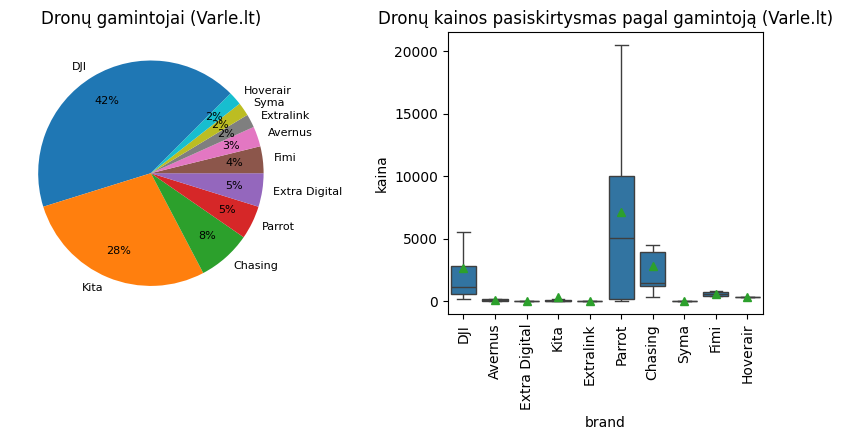

In [4]:
top = df['Gamintojas'].value_counts().head(9).index.tolist()

df['brand'] = df['Gamintojas'].apply(lambda x: x if x in top else 'Kita')
c = df['brand'].value_counts()
df['kaina'] = df['kaina'].apply(lambda x: float(x))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))
# ax.pie(c.values, labels=c.index, autopct='%.f%%')
ax1.pie(c.values, 
        labels=c.index, 
        autopct='%.f%%',
        textprops={'fontsize':8, 'color': 'black'},
        startangle=45,
        # move the percentage inside the arcs
        pctdistance=0.75,
        # add spaces between the arcs
        # explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
        )
ax1.set_title('Dronų gamintojai (Varle.lt)')
sns.boxplot(data=df, x='brand', y='kaina', ax=ax2, showmeans=True, showfliers=False)
ax2.tick_params(axis='x', rotation=90)
ax2.set_title('Dronų kainos pasiskirtysmas pagal gamintoją (Varle.lt)')
plt.tight_layout()
plt.show()

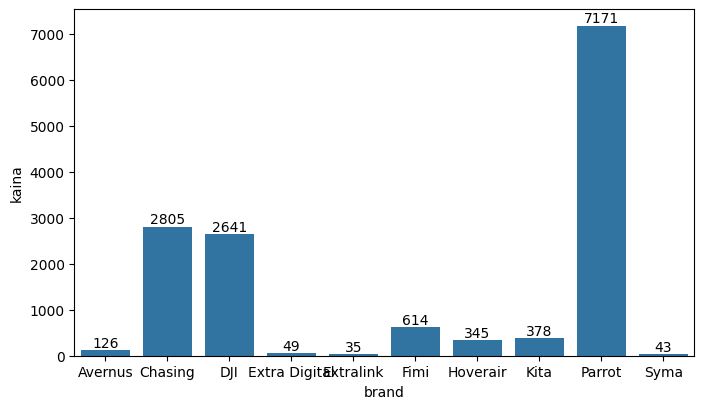

In [5]:
def set_kaina(x):
    return float(x)
df['kaina'] = df['kaina'].apply(set_kaina)

df_gr = df.groupby('brand').mean(numeric_only=True).round()
fig, ax = plt.subplots(figsize=(8, 4.5))
sns.barplot(data=df_gr, x='brand', y='kaina')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [6]:
# skrydzio trukme Varle
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina, 
`Veikimo laikas (min)`,
`Didžiausias skrydžio laikas`
from DronaiVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()
df.head()

,kaina,Veikimo laikas (min),Didžiausias skrydžio laikas
0,1029.99,34,34 minutes
1,329,31,31 minutė
2,385.71,38,38 minutes
3,1239,46,None
4,95.92,18,None


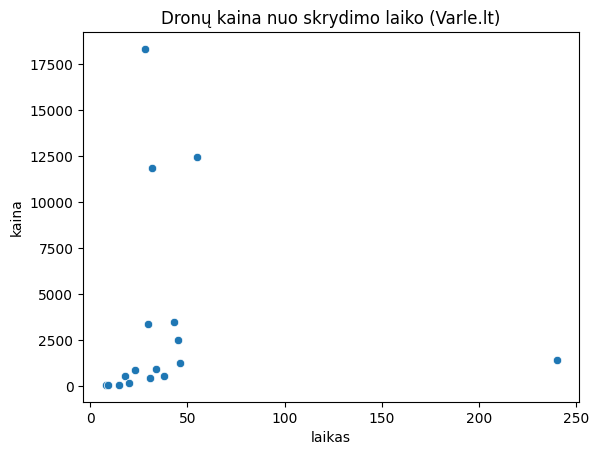

In [7]:
df['Didžiausias skrydžio laikas'] = df['Didžiausias skrydžio laikas'].fillna(df['Veikimo laikas (min)'])
df.dropna(subset=('Didžiausias skrydžio laikas'), inplace=True)
df['laikas'] = df['Didžiausias skrydžio laikas'].str.extract('(\d+)')
df['laikas'] = df['laikas'].apply(lambda x: float(x))

df['kaina'] = df['kaina'].apply(lambda x: float(x))
df_laikas = df[['kaina', 'laikas']]
df_laikas_gr = df_laikas.groupby('laikas').mean(numeric_only=True).round().reset_index()
fig, axis = plt.subplots()
sns.scatterplot(data=df_laikas_gr, x='laikas', y='kaina')
plt.title('Dronų kaina nuo skrydimo laiko (Varle.lt)')
plt.show()

In [ ]:
# atstumas varle
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina, 
`Perdavimo atstumas (lauke ir be kliūčių)`,
`Diagonalinis atstumas`,
`Mokinio atstumas`,
`Maksimalus veikimo atstumas`,
`Valdomas diapazonas`
`Flight time`
from DronaiVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()
df.head()
# nera tinkamu duomenu del atstumo

In [8]:
# gamintojai pigu
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina, 
`Prekės ženklas:`,
`Tipas:`
from DronaiPigu;"""
df_ivairus = pd.read_sql_query(sql, con=SDB)

SDB.close()
df_ivairus.head()

,kaina,Prekės ženklas:,Tipas:
0,59.00,4Hawks,Dronas
1,33.69,Nenurodyta,Dronas
2,302.00,DJI,Dronas
3,59.00,Nenurodyta,Dronas
4,95.92,Avernus,Dronas


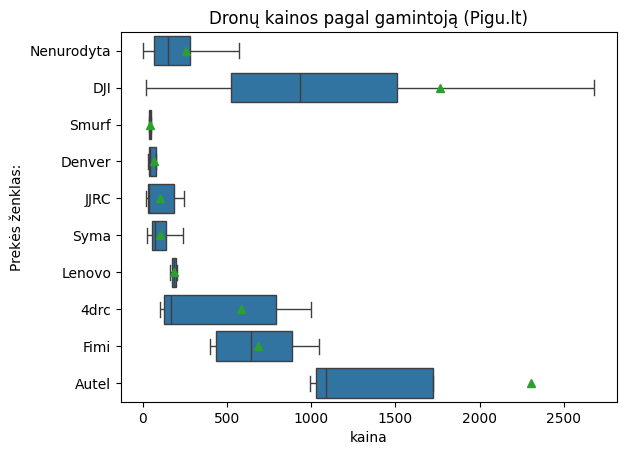

In [9]:

df = df_ivairus[(df_ivairus['Tipas:'] == 'Dronas') | (df_ivairus['Tipas:'] == 'Komplektas')]

top = df['Prekės ženklas:'].value_counts().head(10).index.tolist()

fig, axis = plt.subplots()
sns.boxplot(data=df[df['Prekės ženklas:'].isin(top)], y='Prekės ženklas:', x='kaina', showmeans=True, showfliers=False)
axis.set_title('Dronų kainos pagal gamintoją (Pigu.lt)')
plt.show()


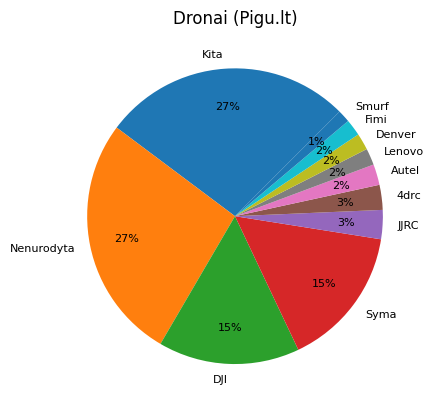

In [10]:
df['gamintojas'] = df['Prekės ženklas:'].apply(lambda x: x if x  in top else 'Kita')
c = df['gamintojas'].value_counts()

fig, axis = plt.subplots()
axis.pie(c.values, 
        labels=c.index, 
        autopct='%.f%%',
        textprops={'fontsize':8, 'color': 'black'},
        startangle=45,
        # move the percentage inside the arcs
        pctdistance=0.75,
        # add spaces between the arcs
        # explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
        )
axis.set_title('Dronai (Pigu.lt)')
plt.show()

In [11]:
# skrydzio laikas/atstumas
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina, 
`Veikimo atstumas:`,
`Skraidymo laikas:`,
`Tipas:`
from DronaiPigu;"""
df_ivairus = pd.read_sql_query(sql, con=SDB)

SDB.close()
df = df_ivairus[(df_ivairus['Tipas:'] == 'Dronas') | (df_ivairus['Tipas:'] == 'Komplektas')]

In [12]:
df['laikas'] = df['Skraidymo laikas:'].str.extract('(\d+)')
df['veikimoAtstumas'] = df['Veikimo atstumas:'].str.extract('(\d+)')
df.dropna(subset=['laikas', 'veikimoAtstumas'], inplace=True)
df['laikas'] = df['laikas'].apply(lambda x: float(x))
df['veikimoAtstumas'] = df['veikimoAtstumas'].apply(lambda x: float(x))



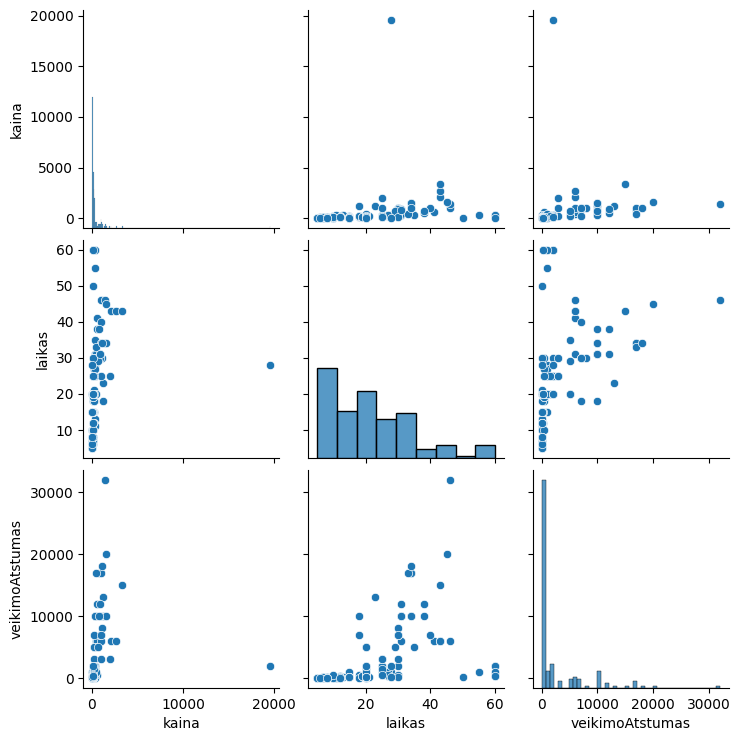

In [13]:
# fig, axis = plt.subplots()
sns.pairplot(data=df)
plt.show()

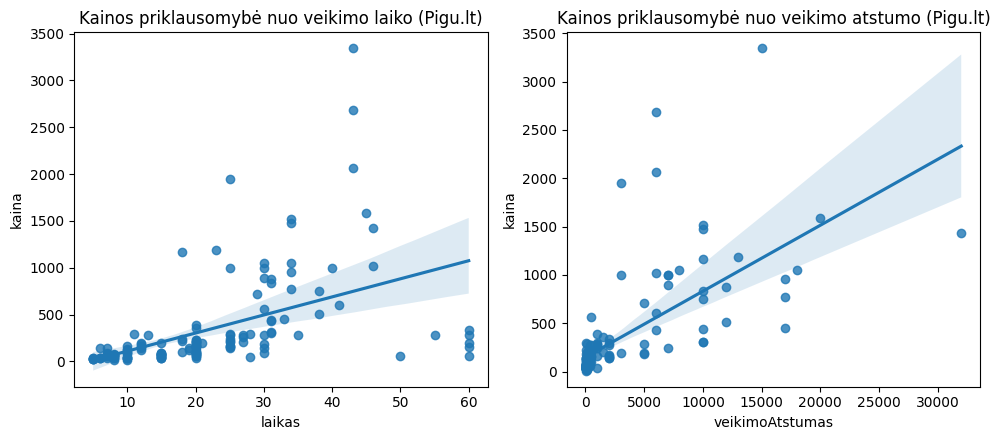

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4.5))
sns.regplot(data=df[df['kaina'] < 15000], x='laikas', y='kaina', order=1, ax=ax1)
sns.regplot(data=df[df['kaina'] < 15000], x='veikimoAtstumas', y='kaina', order=1, ax=ax2)
ax1.set_title('Kainos priklausomybė nuo veikimo laiko (Pigu.lt)')
ax2.set_title('Kainos priklausomybė nuo veikimo atstumo (Pigu.lt)')
plt.tight_layout()
plt.show()

In [15]:
# GPS, kamera, stabilizacija
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina, 
`GPS:`,
`Skrydžio stabilizacija:`,
`Kamera:`,
`Tipas:`
from DronaiPigu;"""
df_ivairus = pd.read_sql_query(sql, con=SDB)

SDB.close()
df = df_ivairus[(df_ivairus['Tipas:'] == 'Dronas') | (df_ivairus['Tipas:'] == 'Komplektas')]
df.head()

,kaina,GPS:,Skrydžio stabilizacija:,Kamera:,Tipas:
0,59.00,Yra,Nenurodyta,Taip,Dronas
1,33.69,Nėra,Nenurodyta,Taip,Dronas
2,302.00,Yra,Yra,Taip,Dronas
3,59.00,Nėra,Nėra,Taip,Dronas
4,95.92,Nenurodyta,Nenurodyta,Taip,Dronas


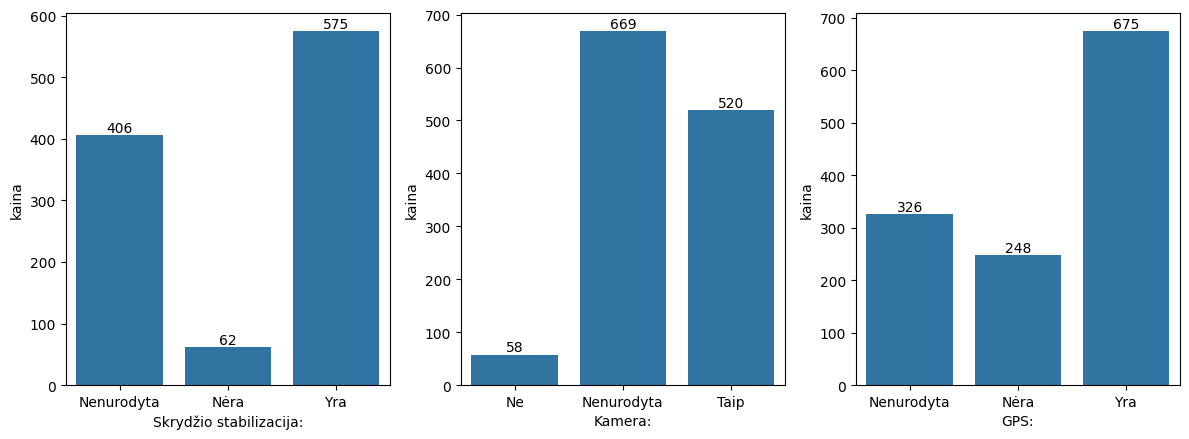

In [16]:
df_stab = df[['kaina', 'Skrydžio stabilizacija:']]
df_stab_gr = df.groupby('Skrydžio stabilizacija:').mean(numeric_only=True).round().reset_index()

df_kam = df[['kaina', 'Kamera:']]
df_kam_gr = df.groupby('Kamera:').mean(numeric_only=True).round().reset_index()

df_gps = df[['kaina', 'Kamera:']]
df_gps_gr = df.groupby('GPS:').mean(numeric_only=True).round().reset_index()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4.5))
sns.barplot(data=df_stab_gr, x='Skrydžio stabilizacija:', y='kaina', ax=ax1)
sns.barplot(data=df_kam_gr, x='Kamera:', y='kaina', ax=ax2)
sns.barplot(data=df_gps_gr, x='GPS:', y='kaina', ax=ax3)
for container in ax1.containers:
    ax1.bar_label(container)
for container in ax2.containers:
    ax2.bar_label(container)
for container in ax3.containers:
    ax3.bar_label(container)
plt.tight_layout()
plt.show()

In [47]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina,
Gamintojas,
`Veikimo laikas (min)`,
`Didžiausias skrydžio laikas`,
`Svoris (kg)`,
`Baterijos talpa (mAh)`,
Talpa,
Stabilizavimas,
Tipas
from DronaiVarle;"""
df = pd.read_sql_query(sql, con=SDB)

SDB.close()
# df.head()

df['kaina'] = df['kaina'].apply(lambda x: float(x))
df['Didžiausias skrydžio laikas'] = df['Didžiausias skrydžio laikas'].fillna(df['Veikimo laikas (min)'])
df['Talpa'] = df['Talpa'].fillna(df['Baterijos talpa (mAh)'])
# # df.dropna(subset=('Didžiausias skrydžio laikas'), inplace=True)
df['laikas'] = df['Didžiausias skrydžio laikas'].str.extract('(\d+)')
df['laikas'] = df['laikas'].apply(lambda x: float(x))
df['Baterija'] = df['Talpa'].str.extract('(\d+)')
df['Baterija'] = df['Baterija'].apply(lambda x: float(x))

In [48]:
price_bins = [0, 100, 200, 400, 600,30000]
price_labels = ['iki 100', '101-200', '201-400', '401-600', ' nuo 600']
df_data = df[['kaina', 'Gamintojas', 'laikas', 'Baterija', 'Stabilizavimas', 'Tipas']]

df_data['price_range'] = pd.cut(df_data['kaina'], bins=price_bins, labels=price_labels, right=True)

grouped = df_data.groupby('price_range')
def safe_mode(x):
    mode = x.mode()
    return mode.iloc[0] if not mode.empty else None

# # find most comman
most_common_drone = grouped.agg({
    # 'kaina': safe_mode,
    'Gamintojas': safe_mode,
    'laikas': safe_mode,
    'Baterija': safe_mode,
    'Stabilizavimas': safe_mode,
    'Tipas': safe_mode
}).reset_index()

print(most_common_drone)

  price_range     Gamintojas  laikas  Baterija   Stabilizavimas  \
0     iki 100  Extra Digital     8.0    1800.0             None   
1     101-200           IDEA    18.0       NaN             None   
2     201-400            DJI    31.0    2250.0  3 ašių (3-axis)   
3     401-600            DJI    18.0    1435.0  3 ašių (3-axis)   
4     nuo 600            DJI    43.0    5000.0  3 ašių (3-axis)   

                                 Tipas  
0                                 Mini  
1                               Su GPS  
2                               Su GPS  
3                                 Mini  
4  Su kamera\n\nIndustriniai\n\nSu GPS  


In [53]:
SDB = sqlite3.connect('VarlePigu.db')
C = SDB.cursor()
sql="""select kaina, 
`Prekės ženklas:`,
`Veikimo atstumas:`,
`Skraidymo laikas:`,
`GPS:`,
`Skrydžio stabilizacija:`,
`Kamera:`,
`Tipas:`
from DronaiPigu;"""
df_ivairus = pd.read_sql_query(sql, con=SDB)

SDB.close()
df = df_ivairus[(df_ivairus['Tipas:'] == 'Dronas') | (df_ivairus['Tipas:'] == 'Komplektas')]

df['laikas'] = df['Skraidymo laikas:'].str.extract('(\d+)')
df['veikimoAtstumas'] = df['Veikimo atstumas:'].str.extract('(\d+)')
# df.dropna(subset=['laikas', 'veikimoAtstumas'], inplace=True)
df['laikas'] = df['laikas'].apply(lambda x: float(x))
df['veikimoAtstumas'] = df['veikimoAtstumas'].apply(lambda x: float(x))




In [55]:

price_bins = [0, 100, 200, 400, 600,30000]
price_labels = ['iki 100', '101-200', '201-400', '401-600', ' nuo 600']
df_data = df[['kaina', 'Prekės ženklas:', 'GPS:', 'Skrydžio stabilizacija:', 'Kamera:', 'laikas', 'veikimoAtstumas']]

df_data['price_range'] = pd.cut(df_data['kaina'], bins=price_bins, labels=price_labels, right=True)

grouped = df_data.groupby('price_range')
def safe_mode(x):
    mode = x.mode()
    return mode.iloc[0] if not mode.empty else None

# # find most comman
most_common_drone = grouped.agg({
    # 'kaina': safe_mode,
    'Prekės ženklas:': safe_mode,
    'GPS:': safe_mode,
    'Skrydžio stabilizacija:': safe_mode,
    'Kamera:': safe_mode,
    'laikas': safe_mode,
    'veikimoAtstumas': safe_mode
}).reset_index()

print(most_common_drone)

  price_range Prekės ženklas:        GPS: Skrydžio stabilizacija: Kamera:  \
0     iki 100      Nenurodyta  Nenurodyta                     Yra    Taip   
1     101-200      Nenurodyta         Yra                     Yra    Taip   
2     201-400      Nenurodyta         Yra                     Yra    Taip   
3     401-600             DJI         Yra                     Yra    Taip   
4     nuo 600             DJI         Yra                     Yra    Taip   

   laikas  veikimoAtstumas  
0    15.0            100.0  
1    20.0           2000.0  
2    20.0           1000.0  
3    31.0            500.0  
4    34.0          10000.0  


In [52]:
df

,kaina,Prekės ženklas:,Veikimo atstumas:,Skraidymo laikas:,GPS:,Skrydžio stabilizacija:,Kamera:,Tipas:,laikas,veikimoAtstumas
0,59.00,4Hawks,350 m,15 min.,Yra,Nenurodyta,Taip,Dronas,15.0,350.0
1,33.69,Nenurodyta,-,- min.,Nėra,Nenurodyta,Taip,Dronas,NaN,NaN
2,302.00,DJI,10000 m,31 min.,Yra,Yra,Taip,Dronas,31.0,10000.0
3,59.00,Nenurodyta,-,- min.,Nėra,Nėra,Taip,Dronas,NaN,NaN
4,95.92,Avernus,500 m,18 min.,Nenurodyta,Nenurodyta,Taip,Dronas,18.0,500.0
...,...,...,...,...,...,...,...,...,...,...
335,183.99,Evi,2000 m,None,Nėra,Yra,Taip,Dronas,NaN,2000.0
344,165.75,4drc,2000 m,20 min.,Yra,Yra,Taip,Dronas,20.0,2000.0
349,63.92,Bewin,200 m,20 min.,Nėra,Nenurodyta,Taip,Dronas,20.0,200.0
358,44.91,Avernus,150 m,15 min.,Nenurodyta,Nenurodyta,Taip,Dronas,15.0,150.0


In [17]:
# most comman pvz

data = {
    'brand': ['Samsung', 'LG', 'Sony', 'Samsung', 'LG', 'Sony', 'TCL'],
    'price': [500, 1500, 1200, 800, 2200, 1100, 3000],
    'size': [50, 55, 43, 65, 55, 55, 43],
    'color': ['Black', 'White', 'Black', 'Black', 'White', 'Black', 'Black'],
    'screen_type': ['LED', 'OLED', 'LCD', 'OLED', 'LED', 'LED', 'LCD'],
    'wifi': ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No'],
    'bluetooth': ['Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

price_bins = [0, 1000, 2000, 3000, 4000]
price_labels = ['<1000', '1000-2000', '2000-3000', '3000+']

df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=False)

grouped = df.groupby('price_range')
# print(grouped)

# find most comman
most_common_tvs = grouped.agg({
    'brand': lambda x: x.mode().iloc[0],
    'price': lambda x: x.mode().iloc[0],
    'size': lambda x: x.mode().iloc[0],
    'screen_type': lambda x: x.mode().iloc[0],
    'wifi': lambda x: x.mode().iloc[0],
    'bluetooth': lambda x: x.mode().iloc[0]
}).reset_index()

print(most_common_tvs)

  price_range    brand  price  size screen_type wifi bluetooth
0       <1000  Samsung    500    50         LED  Yes       Yes
1   1000-2000     Sony   1100    55         LCD  Yes        No
2   2000-3000       LG   2200    55         LED  Yes       Yes
3       3000+      TCL   3000    43         LCD   No        No


In [5]:
import pandas as pd

# Sample dataframe
data = {
    'brand': ['Samsung', 'LG', 'Sony', 'Samsung', 'LG', 'Sony', 'TCL'],
    'price': [400, 650, 300, 1200, 700, 950, 500],
    'size': [50, 55, 43, 65, 55, 55, 43],
    'color': ['Black', 'White', 'Black', 'Black', 'White', 'Black', 'Black'],
    'screen_type': ['LED', 'OLED', 'LCD', 'OLED', 'LED', 'LED', 'LCD'],
    'wifi': ['Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No'],
    'bluetooth': ['Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No']
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Step 1: Categorize prices into ranges using pd.cut()
price_bins = [0, 500, 800, 1200, 2000]  # Define price ranges
price_labels = ['0-500', '501-800', '801-1200', '1201-2000']  # Labels for the ranges
df['price_range'] = pd.cut(df['price'], bins=price_bins, labels=price_labels, right=False)

# Step 2: Group by price range and find the most common TV in each range
# You can use `groupby` and `agg` to find the most common brand or model in each range
most_common_tv = df.groupby('price_range')['brand'].agg(lambda x: x.mode()[0])

# Result
print(df)
print("\nMost common TVs by price range:")
print(most_common_tv)


     brand  price  size  color screen_type wifi bluetooth price_range
0  Samsung    400    50  Black         LED  Yes       Yes       0-500
1       LG    650    55  White        OLED  Yes        No     501-800
2     Sony    300    43  Black         LCD   No        No       0-500
3  Samsung   1200    65  Black        OLED  Yes       Yes   1201-2000
4       LG    700    55  White         LED  Yes       Yes     501-800
5     Sony    950    55  Black         LED  Yes       Yes    801-1200
6      TCL    500    43  Black         LCD   No        No     501-800

Most common TVs by price range:
price_range
0-500        Samsung
501-800           LG
801-1200        Sony
1201-2000    Samsung
Name: brand, dtype: object
